# Ryanodine Receptor Model #
## Combining the works of Dura et al. and Tang et al. ##

In [14]:
####################### Ryanodine Receptor Model ############################
###################### Based on paper by Dura et al. (2002) #################

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

##### The model consists of a gating scheme consisting of 5 closed states and 2 open states ####

#################### Rate Constants ###################################
kon = 712.0 #1/(uM.s)
koff = 3000.0 #### units of all the quantities hereafter is s^-1 ######
kc4o1 = 10000.0 
kc4o2 = 1
ko1c4 = 500
ko2c4 = 0.5
ko1c5 = 2.0
ko2c5 = 3000.0
kc5o1 = 0.6666
kc5o2 = 100.0
kc5I  = 0.5
kIc5 = 1.5
kRc1 = 4*kon
kc1R = koff
kc1c2 = 3*kon
kc2c1 = 2*koff
kc2c3 = 2*kon
kc3c2 = 3*koff
kc3c4 = kon
kc4c3 = 4*koff

######################### State Function ############################
def dXdt(X, t, Ca_cyto, dummy):
    ## Bare Receptor ##
    R = X[0]
    ## 5 Closed States ##
    c1 = X[1]
    c2 = X[2]
    c3 = X[3]
    c4 = X[4]
    c5 = X[5]
    ## 2 Open States ##
    o1 = X[6]
    o2 = X[7]
    
    ######### Dynamical Equations ############
    dRdt = -R*Ca_cyto*kRc1 + c1*kc1R
    dc1dt = -(kc1c2*Ca_cyto + kc1R)*c1 + c2*kc2c1 + kRc1*Ca_cyto*R
    dc2dt = -(kc2c3*Ca_cyto + kc2c1)*c2 + kc3c2*c3 + kc1c2*Ca_cyto*c1
    dc3dt = -(kc3c4*Ca_cyto + kc3c2)*c3 + kc2c3*Ca_cyto*c2 + kc4c3*c4
    dc4dt = -(kc4o1 + kc4o2 + kc4c3)*c4 + kc3c4*Ca_cyto*c3 + ko1c4*o1 + ko2c4*o2
    dc5dt = -(kc5o1 + kc5o2 + kc5I)*c5 + ko1c5*o1 + kIc5*(1-R-c1-c2-c3-c4-c5-o1-o2) + ko2c5*o2
    do1dt = -(ko1c5 + ko1c4)*o1 + kc4o1*c4 + kc5o1*c5
    do2dt = -(ko2c4 + ko2c5)*o2 + kc4o2*c4 + kc5o2*c5
    
    
    return dRdt, dc1dt, dc2dt, dc3dt, dc4dt, dc5dt, do1dt, do2dt

############ Setting up integration ###############,linewidth=1
CaConc = 50 #uM
epsilon = 1e-4 
x0 = np.ones(8)/8
t = np.arange(0., 10.0, epsilon)

########### Looping it over to get trace of open states ######
sol = odeint(dXdt, x0, t, args = (CaConc, 0)) ##Ca_cyto = CaConc
print('Done!')


Done!


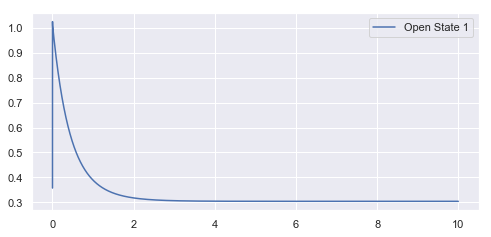

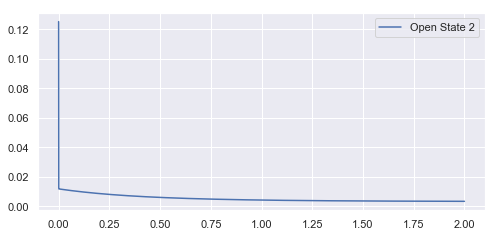

1.0


In [15]:
######################### Plotting #########################
sns.set()
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(t, ((sol[:,6] + sol[:,7])/max(sol[:,6])), label = 'Open State 1')
plt.legend()
plt.figure(figsize = (8,8))
plt.subplot(2,1,2)
plt.plot(t[:20000], sol[:20000,3], label = 'Open State 2')
plt.legend()
plt.show()
print(sum(x0))

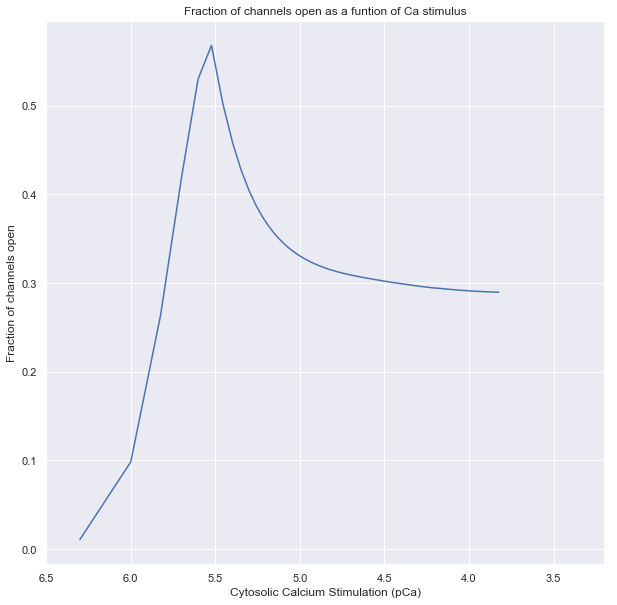

In [34]:
################## Steady State Open Channel Fraction #################

loopLen = 150 ##Goes untill that uM value which is assigned to loopLen
frac = 2
openTrace = np.zeros((t.shape[0], loopLen*frac))
concTrace = np.zeros(loopLen*frac)

for conc in range(loopLen*frac):
    sol = odeint(dXdt, x0, t, args = ((conc + 1)/frac, 0))
    openTrace[:, conc] = (sol[:,6] + sol[:,7])/max(sol[:,6] + sol[:,7])
    concTrace[conc] = (conc + 1)/frac

O = np.zeros(loopLen*frac)
O[:] = openTrace[80000, :]  #### Change the slice for steady state in accordance to epsilon (time step) value #####

######################## Plotting ########################
plt.figure(figsize=(10,10))
plt.title('Fraction of channels open as a funtion of Ca stimulus')
plt.plot(-np.log10(concTrace*10**-6), O)
plt.xlim(6.5,3.2)
plt.xlabel('Cytosolic Calcium Stimulation (pCa)')
plt.ylabel('Fraction of channels open')
plt.show()


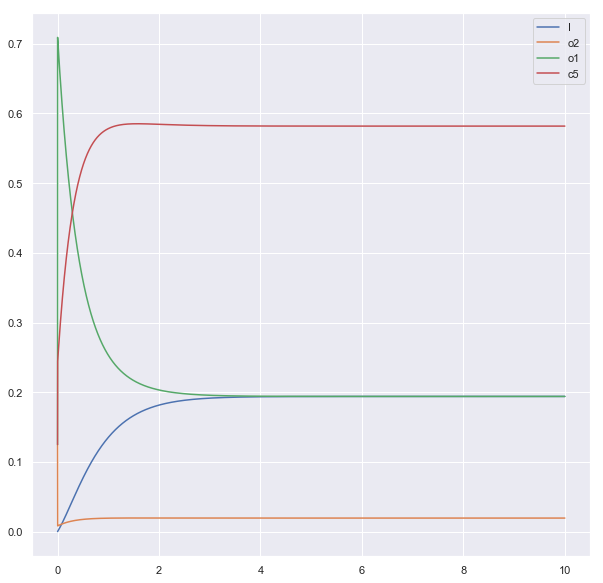

150.0


In [32]:
############################ Steady State values of channel states at 150uM cytosolic calcium ###############
plt.figure(figsize = (10,10))
plt.plot(t,1- sol[:,1] - sol[:,2]- sol[:,3]- sol[:,4]- sol[:,5]- sol[:,6]- sol[:,7]- sol[:,0], label='I')
plt.plot(t,sol[:,7], label='o2')
plt.plot(t,sol[:,6], label = 'o1')
plt.plot(t,sol[:,5], label = 'c5')
# plt.plot(t,sol[:,4],label ='c4')
# plt.plot(t,sol[:,3], label = 'c3')
# plt.plot(t,sol[:,2], label = 'c2')
# plt.plot(t,sol[:,1], label = 'c1')
# plt.plot(t,sol[:,0], label = 'R')
plt.legend()
plt.show()
#print(concTrace[-1])

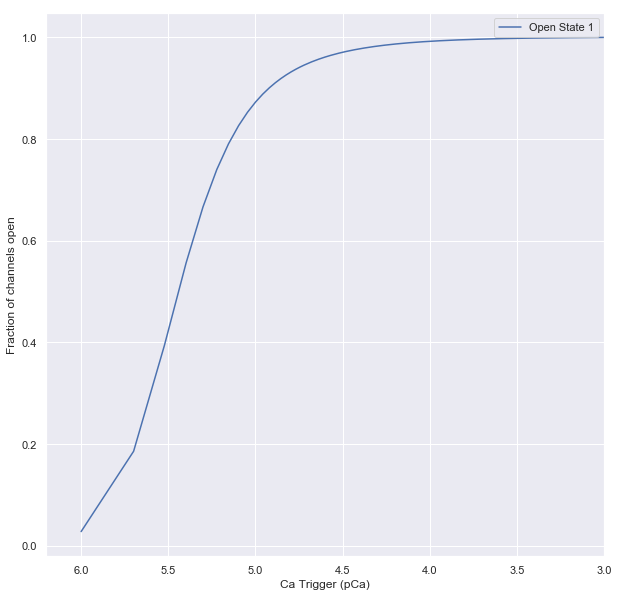

1.0


In [27]:
####################################### H - Mode Channel ########################################
def dYdt(Y, t, Ca_cyto, dummy):
     ## Bare Receptor ##
    R = Y[0]
    ## 5 Closed States ##
    c1 = Y[1]
    c2 = Y[2]
    c3 = Y[3]
    o1 = Y[4]
    
    dRdt = -R*Ca_cyto*kRc1 + c1*kc1R
    dc1dt = -(kc1c2*Ca_cyto + kc1R)*c1 + c2*kc2c1 + kRc1*Ca_cyto*R
    dc2dt = -(kc2c3*Ca_cyto + kc2c1)*c2 + kc3c2*c3 + kc1c2*Ca_cyto*c1
    dc3dt = -(kc3c4*Ca_cyto + kc3c2)*c3 + kc2c3*Ca_cyto*c2 + kc4c3*(1-(c1 + c2 + c3 + o1 + R))
    do1dt = -ko1c4*o1 + kc4o1*(1-(c1 + c2 + c3 + o1 + R))
    
    return dRdt, dc1dt, dc2dt, dc3dt, do1dt 

CaConc = 5 #uM
loopLen = 1000
y0 = np.ones(5)/5
t1 = np.arange(0., 1, epsilon)
openTrace = np.zeros((t.shape[0], loopLen))
concTrace = np.zeros(loopLen)


for conc in range(loopLen):
    sol2 = odeint(dYdt, y0, t1, args = (conc+1, 0)) ##Ca_cyto = CaConc
    openTrace[:, conc] = sol2[:, -1]
    concTrace[conc] = conc + 1

O = np.zeros(loopLen)
O[:] = openTrace[800,:]

    
plt.figure(figsize = (10,10))
plt.plot(-np.log10(concTrace*10**-6), O/max(O), label = 'Open State 1')
plt.xlim(6.2,3)
plt.xlabel('Ca Trigger (pCa)')
plt.ylabel('Fraction of channels open')
plt.legend()
plt.show()
print(sum(y0))

###### Observation: The fraction of channels open does not reduce at higer Ca concentrations #######

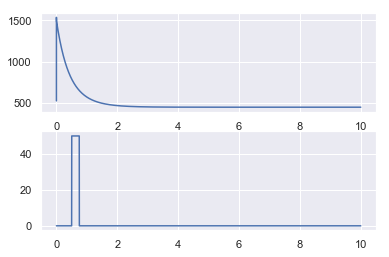

In [28]:
######################## Current due to RyR ######################################
######################## Based on Tang's Paper ###################################
gRyR = 80 #S^-1
Vr = 0.185


Ca_store = 100
def Ca_cyto(t):
    if (0.5)<t<(0.75):
        return 50
    else:
        return 0
    
def Jrel (t):
    return Vr * gRyR * (Ca_store - Ca_cyto(t))

k = (sol[:,6] + sol[:, 7])/max(sol[:,6])
J = np.zeros(t.shape[0])

for ti in range(t.shape[0]):
    J[ti] = k[ti]*Jrel(ti)
    


plt.subplot(2,1,1)    
plt.plot(t,J)
plt.subplot(2,1,2)
plt.plot(t,[Ca_cyto(x) for x in t])
    
#print(t)


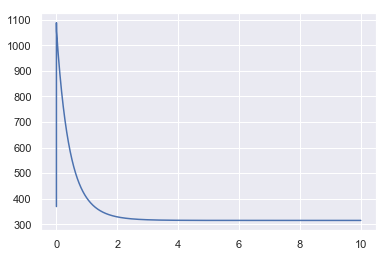

In [29]:
CaCyto = 0.2
Jrelease = [Vr * (o1 + o2) * gRyR * (Ca_store - CaCyto) for o1,o2 in zip(sol[:,6], sol[:,7]) ]
plt.plot(np.arange(0,10,1e-4), Jrelease)

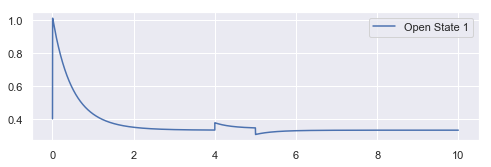

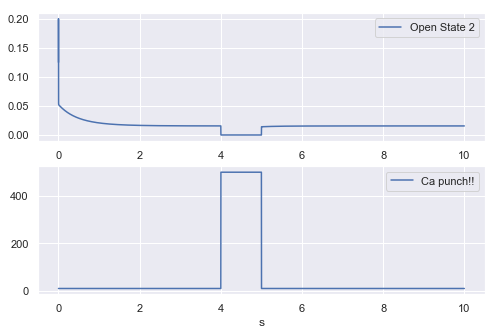

1.0


In [78]:
######################## Giving it a punch after it settles to steady state at high Ca conc ########################
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

##### The model consists of a gating scheme consisting of 5 closed states and 2 open states ####

#################### Rate Constants ###################################
kon = 712.0 #1/(uM.s)
koff = 3000.0 #### units of all the quantities hereafter is s^-1 ######
kc4o1 = 10000.0 
kc4o2 = 1
ko1c4 = 500
ko2c4 = 0.5
ko1c5 = 2.0
ko2c5 = 3000.0
kc5o1 = 0.6666
kc5o2 = 100.0
kc5I  = 0.5
kIc5 = 1.5
kRc1 = 4*kon
kc1R = koff
kc1c2 = 3*kon
kc2c1 = 2*koff
kc2c3 = 2*kon
kc3c2 = 3*koff
kc3c4 = kon
kc4c3 = 4*koff

######################### Ca Conc Function ##########################
def Ca_cyto(t):
    if(4<t<5):
        return 500
    else:
        return 10

######################### State Function ############################
def dXdt(X, t):
    ## Bare Receptor ##
    R = X[0]
    ## 5 Closed States ##
    c1 = X[1]
    c2 = X[2]
    c3 = X[3]
    c4 = X[4]
    c5 = X[5]
    ## 2 Open States ##
    o1 = X[6]
    o2 = X[7]
    
    ######### Dynamical Equations ############
    dRdt = -R*Ca_cyto(t)*kRc1 + c1*kc1R
    dc1dt = -(kc1c2*Ca_cyto(t) + kc1R)*c1 + c2*kc2c1 + kRc1*Ca_cyto(t)*R
    dc2dt = -(kc2c3*Ca_cyto(t) + kc2c1)*c2 + kc3c2*c3 + kc1c2*Ca_cyto(t)*c1
    dc3dt = -(kc3c4*Ca_cyto(t) + kc3c2)*c3 + kc2c3*Ca_cyto(t)*c2 + kc4c3*c4
    dc4dt = -(kc4o1 + kc4o2 + kc4c3)*c4 + kc3c4*Ca_cyto(t)*c3 + ko1c4*o1 + ko2c4*o2
    dc5dt = -(kc5o1 + kc5o2 + kc5I)*c5 + ko1c5*o1 + kIc5*(1-R-c1-c2-c3-c4-c5-o1-o2) + ko2c5*o2
    do1dt = -(ko1c5 + ko1c4)*o1 + kc4o1*c4 + kc5o1*c5
    do2dt = -(ko2c4 + ko2c5)*o2 + kc4o2*c4 + kc5o2*c5
    
    
    return dRdt, dc1dt, dc2dt, dc3dt, dc4dt, dc5dt, do1dt, do2dt

############ Setting up integration ###############
CaConc = 50 #uM
epsilon = 1e-4 
x0 = np.ones(8)/8
t = np.arange(0., 10.0, epsilon)

########### Looping it over to get trace of open states ######
sol = odeint(dXdt, x0, t) ##Ca_cyto = CaConc
#print('Done!')
ca = [Ca_cyto(t) for t in t]

######################### Plotting #########################
sns.set()
plt.figure(figsize = (8,8))
plt.subplot(3,1,1)
plt.plot(t, ((sol[:,6] + sol[:,7])/max(sol[:,6])), label = 'Open State 1')
plt.legend()
plt.figure(figsize = (8,8))
plt.subplot(3,1,2)
plt.plot(t, sol[:,3], label = 'Open State 2')
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,ca,label='Ca punch!!')
plt.xlabel('s')
plt.legend()
plt.show()
print(sum(x0))

1. The punch gives sharper change in fraction of channels open if the baseline concentraction is in 10$\mu$M order of magnitude
2. The punch gives a milder response when baseline concentration is in 100uM order of magnitude
3. The channels in O2 states shoot in the direction **opposite** to that of Ca punch and those in O1 shoot in the direction same as Ca Punch.
4. An increase in Ca results is a milder punch than decreasing Ca